# Customer Churn Reduction
## Victoria Hall
## Spring 2022


The purpose of this project is to utilize different machine learning techniques to create a tool that a company can use to predict whether a customer is likely to churn or not. By providing these predictions any number of business stakeholders like, a marketing or merchant team, can produce strategies to intervene and try to prevent churn. Multiple classification models were tested before the final results was chosen.



### Initial Cleansing and EDA

In [1]:
#Loading libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.ticker import MultipleLocator

#### Exploring the Elements of the Initial Data Frame

In [2]:
#Reading in data
churn_df = pd.read_csv('Churn_Modelling.csv')

In [3]:
churn_df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn_df.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
print("Rows:",churn_df.shape[0])
print("Columns:", churn_df.shape[1])

Rows: 10000
Columns: 14


In [6]:
#Checking data types
churn_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
#Checking for missing values
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
#Looking at unique values
churn_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Removing unnecessary information
After reviewing the initial dataframe, the data appears to already be relatively clean for modeling. There are 10,000 rows of data with 14 columns. There are no missing values and the object types of the columns appear to match the data. For the purpose of modeling, the first three columns in the frame aren't necessary. These are RowNumber, CustomerID, and Surname. I am going to drop these columns. Other than dropping unnecessary information to save on processing time for the model, the additional benefit is that by removing these identification features, we can protect the anonymity of the customers in the model building process. 

There are a few additional features that will need transfomed before modeling, including geography and gender which will need to be converted to dummy features. However, before executing those changes, I am going to perform some additional EDA, leaving the data in its current for interpretibility. 

In [10]:
#dropping columns
churn_df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
churn_df.shape

(10000, 11)

In [12]:
churn_df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

#### Step 3 EDA and Visualization

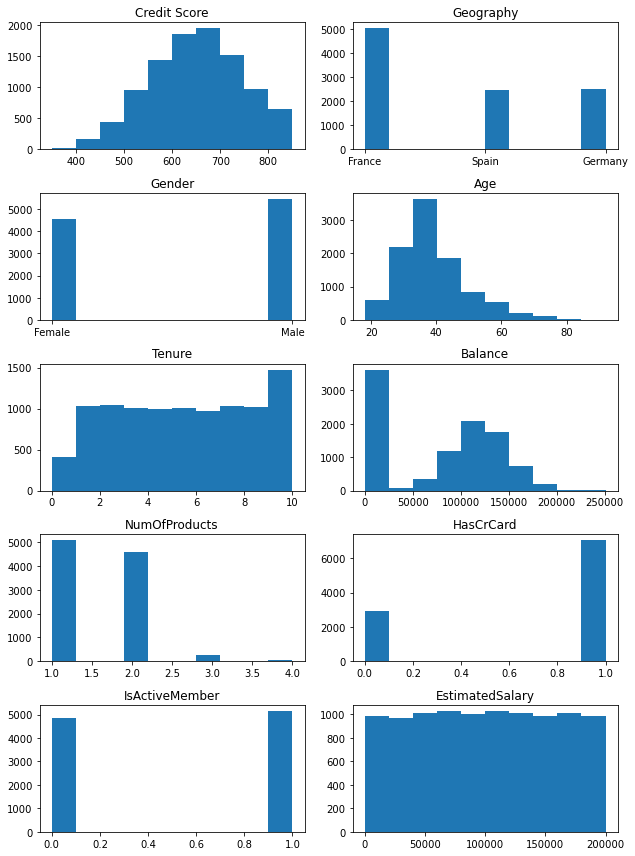

In [13]:
#Looking at distributions of features

plt.subplot(5,2,1)
plt.hist(churn_df.CreditScore)
plt.title("Credit Score")

plt.subplot(5,2,2)
plt.hist(churn_df.Geography)
plt.title("Geography")

plt.subplot(5,2,3)
plt.hist(churn_df.Gender)
plt.title("Gender")

plt.subplot(5,2,4)
plt.hist(churn_df.Age)
plt.title("Age")

plt.subplot(5,2,5)
plt.hist(churn_df.Tenure)
plt.title("Tenure")

plt.subplot(5,2,6)
plt.hist(churn_df.Balance)
plt.title("Balance")

plt.subplot(5,2,7)
plt.hist(churn_df.NumOfProducts)
plt.title("NumOfProducts")

plt.subplot(5,2,8)
plt.hist(churn_df.HasCrCard)
plt.title("HasCrCard")

plt.subplot(5,2,9)
plt.hist(churn_df.IsActiveMember)
plt.title("IsActiveMember")

plt.subplot(5,2,10)
plt.hist(churn_df.EstimatedSalary)
plt.title("EstimatedSalary")


plt.tight_layout(rect=[0, 0, 1.5, 3])
plt.show()

The above histograms are for the features in the data set. Starting with credit score, we see a relatively normal distribution, however it does appear to be right skewed. Our geography classes appear unevenly distributed with French cases doubling Spanish and German cases. Gender appears slightly unbalanced with more males but isn't as extreme. Age is left skewed with most individuals being between 30 and 60. Tenure appears to be pretty evenly distributed except at the tails with low amounts at 0-1 and high amounts between 9 and 19. Balance appears normal except for a large amount of cases below 50,000. We also see that most clients ahve 1-2 products, with more having credit cards and a pretty even split between active and nonactive genders. Finally, salary seems evenly balance bwtween 0 and 200,000.

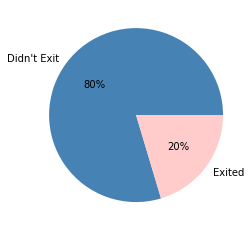

In [15]:
di={0:"Didn't Exit",1:"Exited"}
churn_df.replace({"Exited":di},inplace=True)
colors = ['steelblue','#ffcccb']
ax = churn_df['Exited'].value_counts().plot(kind='pie',y='Exited',autopct='%1.0f%%',colors=colors,legend=False)
ax.set_ylabel(None)
plt.show()

In [16]:
di={"Didn't Exit":0,"Exited":1}
churn_df.replace({"Exited":di},inplace=True)
churn_df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The target class is unbalanced which is common with churn problems. 

In [17]:
churn_df.Exited.describe()

count    10000.000000
mean         0.203700
std          0.402769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Exited, dtype: float64

About 20% of cases are customer that churned. 

#### Variance Analysis
Before I start training in models I want to look at the interactions of variables in case anything can be removed that won't support the model. 

In [18]:
churn_df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
churn_df.shape[1]

11

<AxesSubplot:>

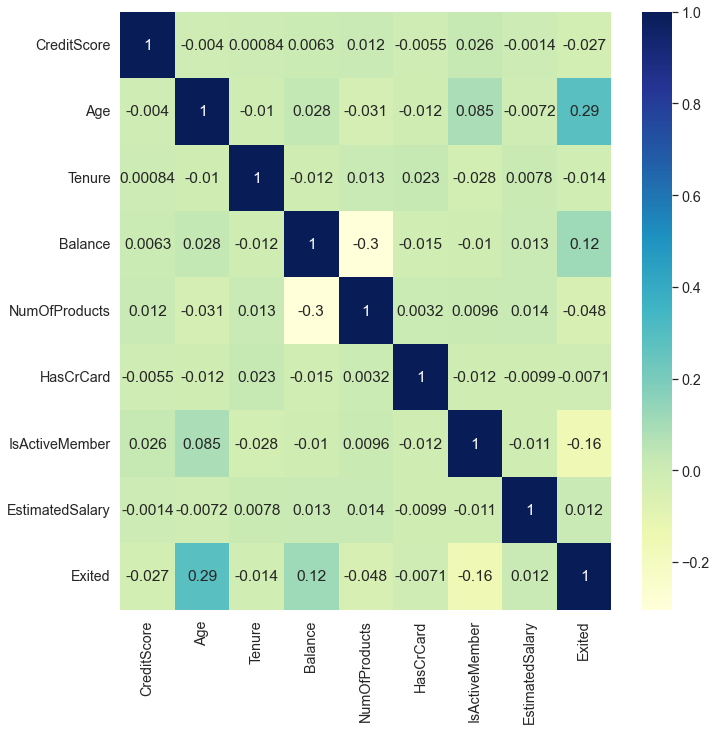

In [20]:
#Creating a heat map of correlation between features

#scaling fonts, setting figure size based on columns
sns.set(font_scale=1.3)
plt.figure(figsize=(11,11))

#Finding correlation
corr = churn_df.corr()

sns.heatmap(corr, annot=True, cmap="YlGnBu")

Age, Current Balance, and Membership Status seem to be the choices that are most highly correlated with exiting the business. There also appears to be a relationship between balance and the number of products the individual has. The good news is that there doesn't appear to be any strong multicollinearity among the features. 

In [21]:
#There are a few categorical features in the dataframe including geography and gender. 
#I'm going to convert these to dummy variables

churn_df2 = pd.get_dummies(churn_df)

In [22]:
churn_df2.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [23]:
churn_df2.shape

(10000, 14)

In [24]:
churn_df2["Exited"] = churn_df2["Exited"].astype(bool)

I initially considered performing PCA on this set before running any models but this data is not highly dimensional. After the creation of dummy variables, there are only 14 columns with 10,000 cases of data. Also, based on our heatmap, I didn't see any variables that were so highly correlated that I would be concerned about multicollinearity either.  I don't think including all these columns will hinder or slow down the model building and application, so I'm going to keep all of the current variables in the model and skip PCA in this instance. I think there are more benefits not performing PCA than there are including it. 

#### Final Transformations - Splitting Data

In [25]:
#Splitting the target variable from the features
X = churn_df2.drop(["Exited"],axis = 1)
y = churn_df2["Exited"]

In [47]:
#Final Check for multicollinearity just to be safe.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

              feature       VIF
0         CreditScore  1.001046
1                 Age  1.012064
2              Tenure  1.001935
3             Balance  1.336461
4       NumOfProducts  1.122391
5           HasCrCard  1.001580
6      IsActiveMember  1.010516
7     EstimatedSalary  1.000936
8    Geography_France       inf
9   Geography_Germany       inf
10    Geography_Spain       inf
11      Gender_Female       inf
12        Gender_Male       inf


No cause for concern with multicollinearity

In [26]:
churn_df2.Exited.dtype

dtype('bool')

In [27]:
#Splitting into training and test sets - I'm going to use a 75/25 split
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=8675309)

#### Running Modeling Experiments
I'm going to run multiple models and cross validate the results of these models. Below is a list of the models I'm testing as well as the metrics I'm going to use for model evaluation. All of the models I've chosen should support this supervised binary classifcation task but approach the problem slightly differently. I'm going to use logistic regression as my baseline model. 

Models to Test:
1. Logistic Regression - Baseline linear classifier for binary data
2. Random Forest - Ensemble Bagging Classifier (Bootstrap Aggregation)
    - Makes predictions by combining classifiers on bootstrapped subsets 
3. K-Nearest Neighbors - Instance Based Classifier
    - Makes predictions based on the training set only by searching for the most similar instances
4. Support Vector Machine - Maximal Margin Classifier
    - Finds the hyperplane that splits the data into two groups, and chooses the the hyperplane that maximizes the margin (distance between hyperplane and close points)
5. XGBoost - Ensemble Boosting Classifier
    - Type of gradient boosting. Traings many models in a gradual additive manner and identifies shortcomings with a loss function.
6. Multilayer Perceptron Classifier (MLP Classifer)
    - Relies on an underlying neural network


Model Evaluation Metrics:
1. Precision - The ability of the classifier to not label as positive a sample that is negative. Best Value is 1 and worst value is 0.
2. Recall - The ability of the classifer to find all the positive samples. The best value is 1 and worst is at 0.
3. F1 Score - Harmonic Mean of Precision aand Recall. Best Value is a 1 and worst is at 0.
4. ROC_AUC Score - Tells how much the model is capable of distinguishing classes. The higher the score, the better the model is at performing. 


In [28]:
#Importing models and evaluation tools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

C:\Users\hallt\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [29]:
#creating function to run models and evaluate
#This a modified code block I orignally sourced from https://towardsdatascience.com/quickly-test-multiple-models-a98477476f0 
import warnings
warnings.filterwarnings("ignore")

def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    dfs = []
    
    #instantiating models
    models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()),
          ('XGB', XGBClassifier(verbosity = 0)), #setting verbosity to 0, so it doesn't print the warnings
          ('MLP',MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1))
            ]
    results = []
    names = []
    scoring = ['precision', 'recall', 'f1', 'roc_auc']
    target_names = ['Didnt Exit', 'Exited']
    
    #Running models and appending results to df
    for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210) #using 5 splits based on standards of using 5 or 10
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring) #creating results object
        clf = model.fit(X_train, y_train) #fitting the model
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names)) #printing resulting metrics of each model
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results) #creating a dataframe to be used for visualizing the results later on
        this_df['model'] = name
        dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)

   ## To obtain beter estimates of the performance metrics, using bootstrapping at 30 samples with replacement
    bootstraps = []
    for model in list(set(final.model.values)):
        model_df = final.loc[final.model == model]
        bootstrap = model_df.sample(n=30, replace=True)
        bootstraps.append(bootstrap)
        
    bootstrap_df = pd.concat(bootstraps, ignore_index=True)
    results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
    time_metrics = ['fit_time','score_time'] # fit time metrics
    
    # PERFORMANCE METRICS
    results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
    results_long_nofit = results_long_nofit.sort_values(by='values')
    # TIME METRICS
    results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
    results_long_fit = results_long_fit.sort_values(by='values')     
        
    ## Plotting the performance metrics
    plt.figure(figsize=(20, 12))
    sns.set(font_scale=2.5)
    g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3") #plotting the values
    g.xaxis.set_minor_locator(MultipleLocator(0.5)) #creating line between each model performances
    g.xaxis.grid(True, which='minor', color='black', lw=2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('Comparison of Model by Classification Metric')
    plt.savefig('./benchmark_models_performance.png',dpi=300)
    
    #Plotting training and scoring times
    plt.figure(figsize=(20, 12))
    sns.set(font_scale=2.5)
    g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
    g.xaxis.set_minor_locator(MultipleLocator(0.5))
    g.xaxis.grid(True, which='minor', color='black', lw=2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('Comparison of Model by Fit and Score Time')
    plt.savefig('./benchmark_models_time.png',dpi=300)
    
    return

LogReg
              precision    recall  f1-score   support

  Didnt Exit       0.80      0.98      0.88      1985
      Exited       0.45      0.07      0.12       515

    accuracy                           0.79      2500
   macro avg       0.62      0.52      0.50      2500
weighted avg       0.73      0.79      0.72      2500

RF
              precision    recall  f1-score   support

  Didnt Exit       0.87      0.97      0.92      1985
      Exited       0.78      0.46      0.58       515

    accuracy                           0.86      2500
   macro avg       0.83      0.71      0.75      2500
weighted avg       0.85      0.86      0.85      2500

KNN
              precision    recall  f1-score   support

  Didnt Exit       0.80      0.94      0.86      1985
      Exited       0.27      0.09      0.14       515

    accuracy                           0.76      2500
   macro avg       0.54      0.51      0.50      2500
weighted avg       0.69      0.76      0.71      2500

SVM
 

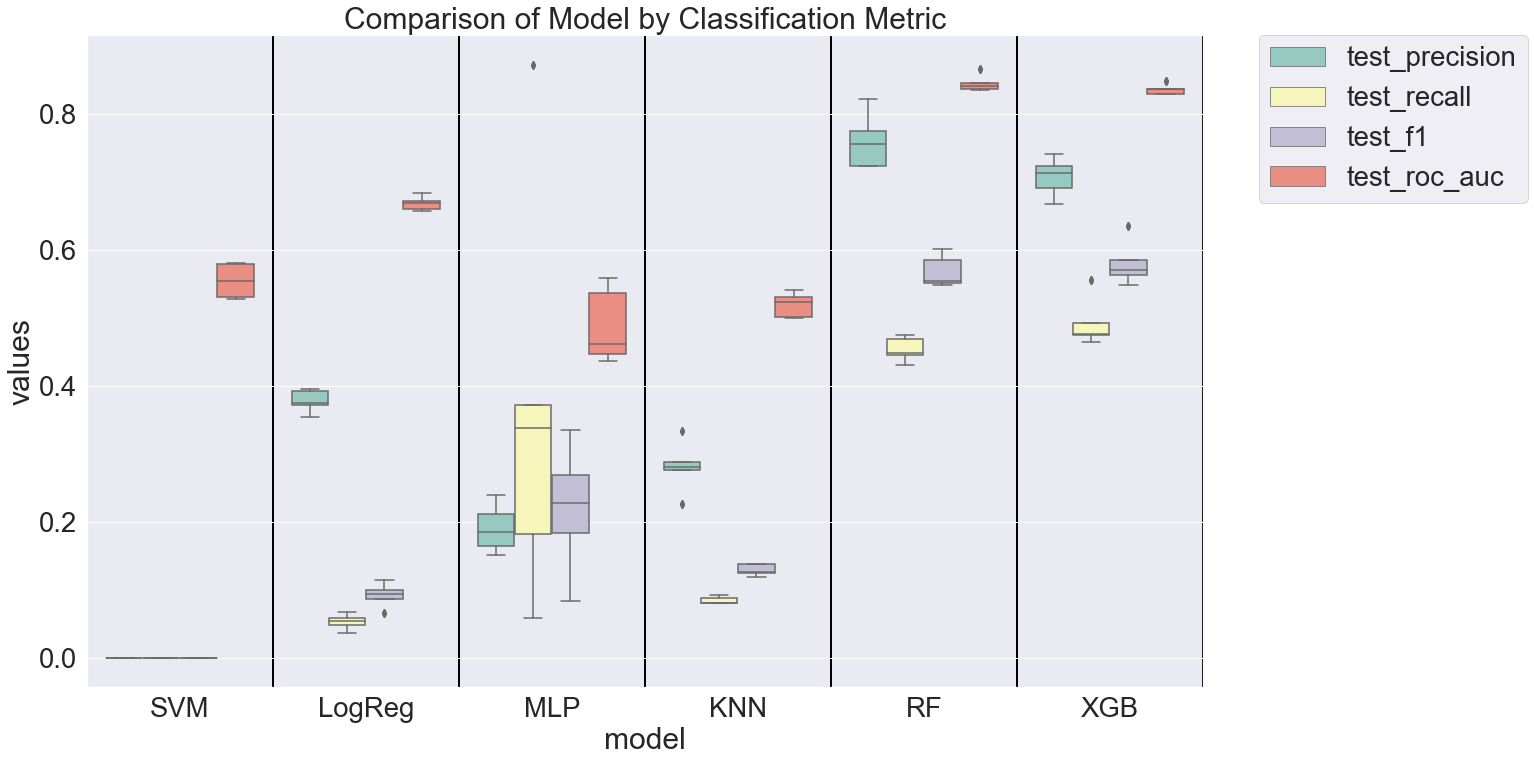

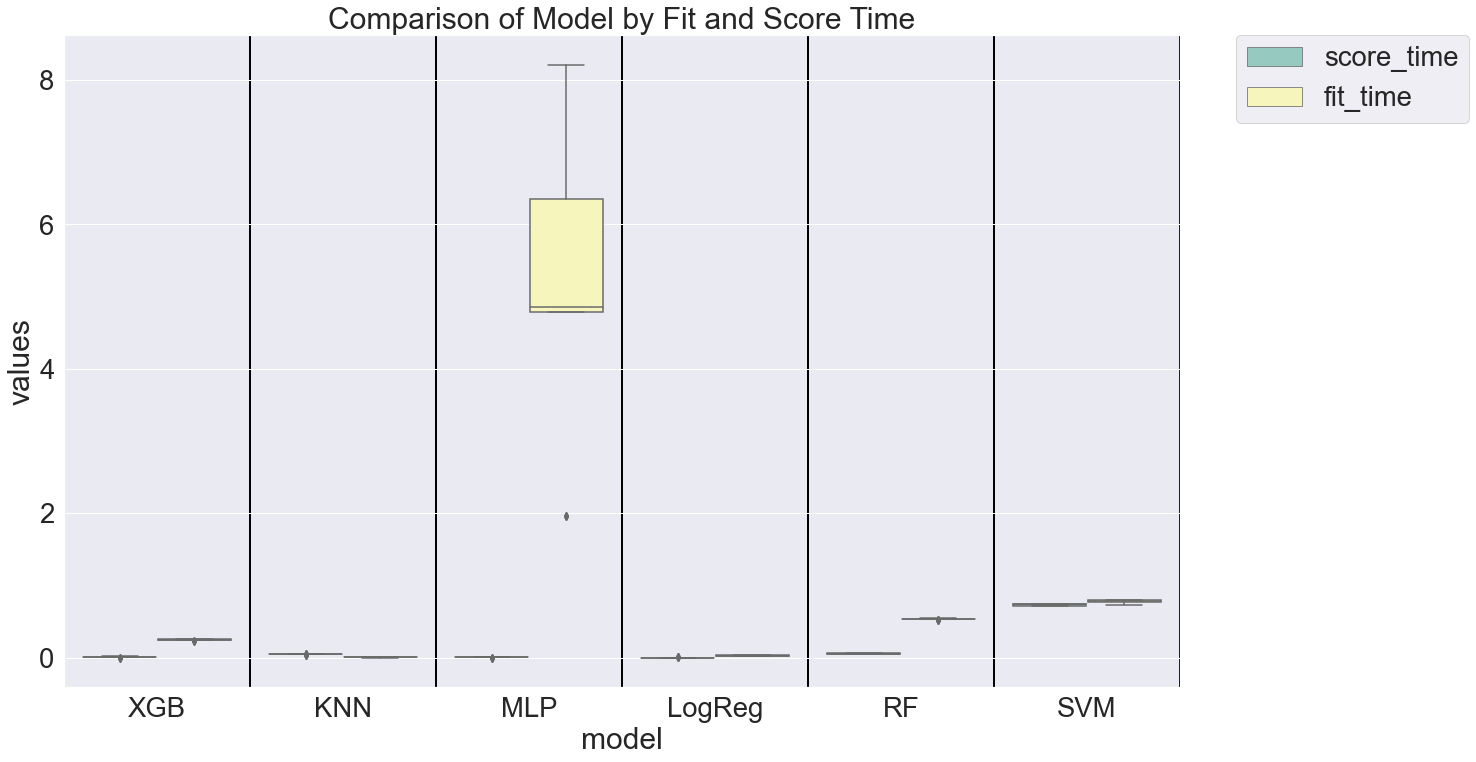

In [30]:
run_exps(X_train,y_train,X_test,y_test)

#### Evaluation
All of the models performed pretty well at identifying which customers would not exit the business. However, the purpose of this churn evaluation is to identify customers who are likely to exit the business so that we can intervene with some sort of marketing or promotions to encourage these customers to stay. I expected this result because the classes were heavily imbalanced. So, for the purposes of this problem, I am really focused on the results of models which correctly identified those who exited the company. Accuracy is also included the model results but I focusing my evaluation precision, recall, F1 score, and the roc_auc score. Of all the models, XGBoost and Random Forest Modeling seemed the best the performing models. The scores are pretty similar, with F1 scores at .57 and .59.

### Model Tuning

In [31]:
#hyper parameter pos_weight. Recommend way to determine is count of negative/count of positive 
#from https://xgboost.readthedocs.io/en/latest/parameter.html
from collections import Counter
counter = Counter(y)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 3.909


In [32]:
#Checking XGBoost with different weights
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
#Creating a grid search to find the optimal value of weights for the postitive classes

# define model
model = XGBClassifier()
# define grid
weights = [1,3.909,5,7,10]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='recall')
# execute the grid search
grid_result = grid.fit(X_train, y_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.696690 using {'scale_pos_weight': 10}
0.488850 (0.034654) with: {'scale_pos_weight': 1}
0.625490 (0.039031) with: {'scale_pos_weight': 3.909}
0.643454 (0.035429) with: {'scale_pos_weight': 5}
0.671282 (0.030407) with: {'scale_pos_weight': 7}
0.696690 (0.035168) with: {'scale_pos_weight': 10}


The grid search results are not showing me the recall for those who exited the business. So I manually adjusted the weights in the function below to find an optimal recall score

#### Random Forest Model

In [33]:
#Splitting the target variable from the features
X = churn_df2.drop(["Exited"],axis = 1)
y = churn_df2["Exited"]

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=3)

In [35]:
#Fitting Model
model3 = RandomForestClassifier(random_state = 24, n_jobs = -1)
model3.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=24)

In [36]:
#Testing parameters
n_estimators = [500,1000]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model3, hyperF, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [37]:
print("Best: %f using %s" % (bestF.best_score_, bestF.best_params_))

Best: 0.865600 using {'max_depth': 25, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 1000}


In [38]:
model4 = RandomForestClassifier(random_state = 24, n_jobs = -1,max_depth = 15, min_samples_leaf = 2, min_samples_split =15, n_estimators = 1000)

In [39]:
#Evaluating new model
target_names = ['Didnt Exit', 'Exited']
clf = model4.fit(X_train, y_train) #fitting the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names)) #printing resulting metrics of each model
        

              precision    recall  f1-score   support

  Didnt Exit       0.87      0.97      0.92      1982
      Exited       0.80      0.45      0.57       518

    accuracy                           0.86      2500
   macro avg       0.84      0.71      0.75      2500
weighted avg       0.86      0.86      0.85      2500



In [40]:
#importing shap to show model feature importance
import shap

In [41]:
import warnings
warnings.filterwarnings("ignore")

#using parameters of Random Forest
def run_exps2(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    dfs = []
    
    #instantiating models
    models = [
            ('Base XGB', XGBClassifier(verbosity = 0)),
            ('Tuned XGB', XGBClassifier(verbosity = 0,scale_pos_weight = 100)),#model with weights
            ('Base RF', RandomForestClassifier()),
            ('Tuned RF', RandomForestClassifier(random_state = 24, n_jobs = -1,max_depth = 15, min_samples_leaf = 2, min_samples_split =15, n_estimators = 500))]
    results = []
    names = []
    scoring = ['precision', 'recall', 'f1', 'roc_auc']
    target_names = ['Didnt Exit', 'Exited']
    
    #Running models and appending results to df
    for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210) #using 5 splits based on standards of using 5 or 10
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring) #creating results object
        clf = model.fit(X_train, y_train) #fitting the model
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names)) #printing resulting metrics of each model
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results) #creating a dataframe to be used for visualizing the results later on
        this_df['model'] = name
        dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)
        # get feature importance
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        shap.summary_plot(shap_values, X_test, plot_type="bar")
        

   ## To obtain beter estimates of the performance metrics, using bootstrapping at 30 samples with replacement
    bootstraps = []
    for model in list(set(final.model.values)):
        model_df = final.loc[final.model == model]
        bootstrap = model_df.sample(n=30, replace=True)
        bootstraps.append(bootstrap)
        
    bootstrap_df = pd.concat(bootstraps, ignore_index=True)
    results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
    time_metrics = ['fit_time','score_time'] # fit time metrics
    
    # PERFORMANCE METRICS
    results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
    results_long_nofit = results_long_nofit.sort_values(by='values')
    # TIME METRICS
    results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
    results_long_fit = results_long_fit.sort_values(by='values')     
        
    ## Plotting the performance metrics
    plt.figure(figsize=(20, 12))
    sns.set(font_scale=2.5)
    g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3") #plotting the values
    g.xaxis.set_minor_locator(MultipleLocator(0.5)) #creating line between each model performances
    g.xaxis.grid(True, which='minor', color='black', lw=2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('Comparison of Model by Classification Metric')
    plt.savefig('./benchmark_models_performance.png',dpi=300)
    
    #Plotting training and scoring times
    plt.figure(figsize=(20, 12))
    sns.set(font_scale=2.5)
    g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
    g.xaxis.set_minor_locator(MultipleLocator(0.5))
    g.xaxis.grid(True, which='minor', color='black', lw=2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('Comparison of Model by Fit and Score Time')
    plt.savefig('./benchmark_models_time.png',dpi=300)

    
    return

Base XGB
              precision    recall  f1-score   support

  Didnt Exit       0.88      0.95      0.91      1985
      Exited       0.71      0.51      0.59       515

    accuracy                           0.86      2500
   macro avg       0.80      0.73      0.75      2500
weighted avg       0.85      0.86      0.85      2500



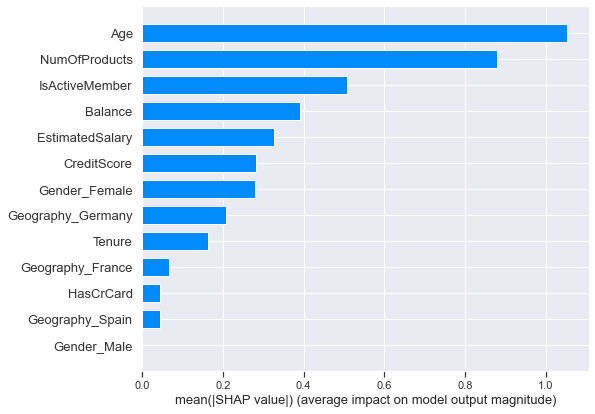

Tuned XGB
              precision    recall  f1-score   support

  Didnt Exit       0.93      0.66      0.77      1985
      Exited       0.38      0.81      0.52       515

    accuracy                           0.69      2500
   macro avg       0.65      0.73      0.64      2500
weighted avg       0.82      0.69      0.72      2500



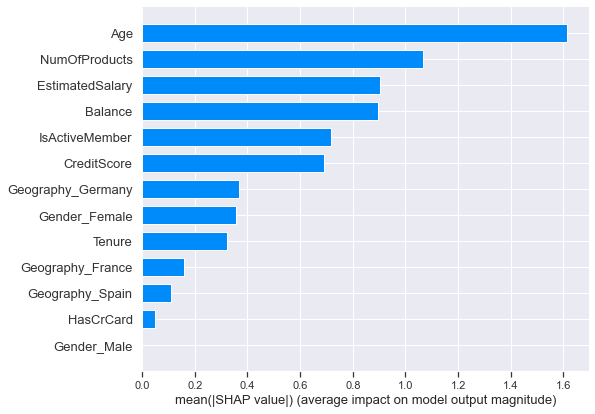

Base RF
              precision    recall  f1-score   support

  Didnt Exit       0.87      0.97      0.92      1985
      Exited       0.77      0.44      0.56       515

    accuracy                           0.86      2500
   macro avg       0.82      0.70      0.74      2500
weighted avg       0.85      0.86      0.84      2500



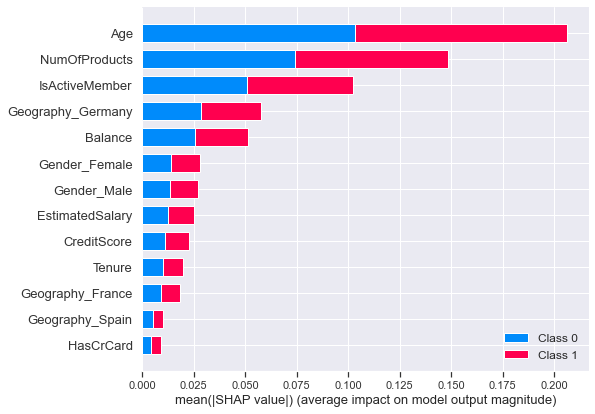

Tuned RF
              precision    recall  f1-score   support

  Didnt Exit       0.87      0.97      0.92      1985
      Exited       0.79      0.43      0.55       515

    accuracy                           0.86      2500
   macro avg       0.83      0.70      0.73      2500
weighted avg       0.85      0.86      0.84      2500



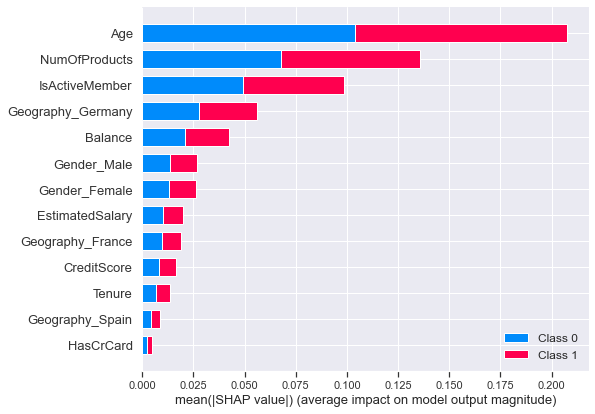

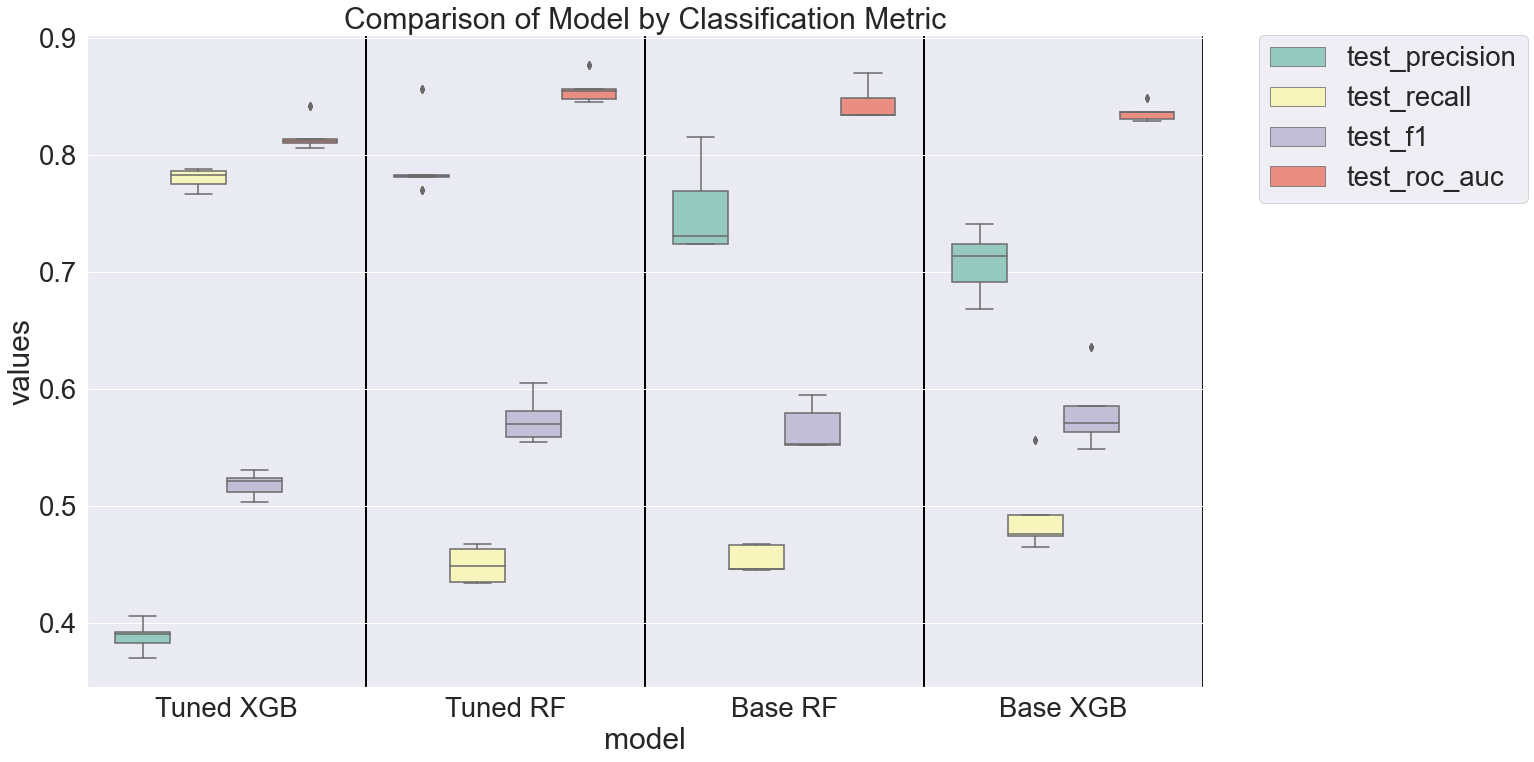

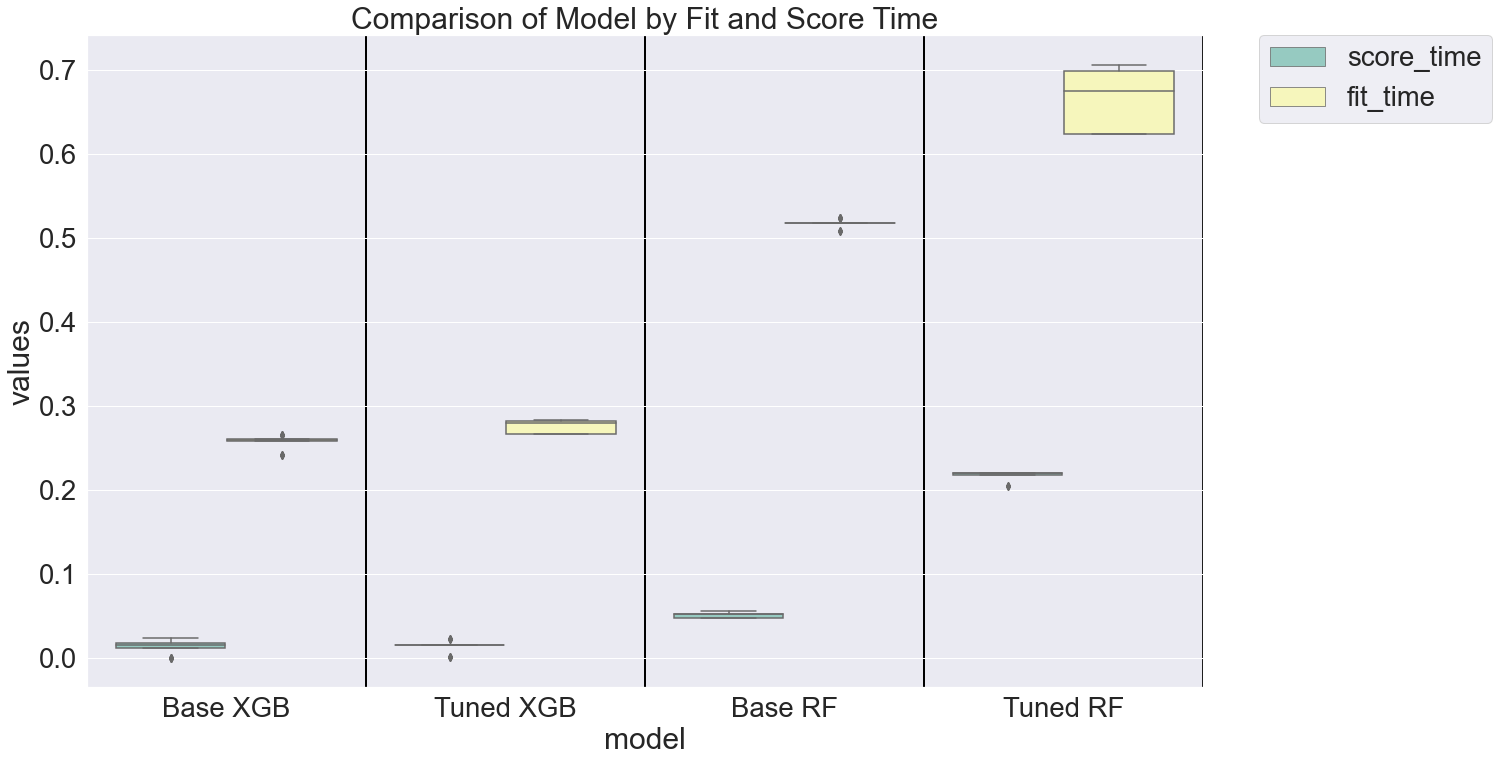

In [42]:
#Running againg with updated random forest and xgboost parameters. Also including feature importance metrics
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=8675309)


run_exps2(X_train,y_train,X_test,y_test)

#### Final Results

The tuned XGBoost model that optimized the recall score was the best of the models evaluated. The precision score was .38 and the recall score was .81. This model will more accurately identify customers who look like they will leave the business, but we might also have some instances of identifying customers that are not leaving the business. It will be more cost effective to accidentally reach out to some of the wrong people rather than sacrificing customers who are likely to leave.
	This model is not perfect. A better model might be derived with more data, specifically more data about those who opted to leave the business. But with the data available this model should be able to identify those who will potentially leave the business so intervention steps can be taken. 
